<a href="https://colab.research.google.com/github/Anuargharsh/Movie/blob/main/cats_v_dogs_classificartion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 41.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [14]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.4493 - accuracy: 0.5849 - val_loss: 0.6113 - val_accuracy: 0.6664
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5965 - accuracy: 0.6960 - val_loss: 0.6083 - val_accuracy: 0.6428
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5135 - accuracy: 0.7497 - val_loss: 0.4969 - val_accuracy: 0.7578
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4430 - accuracy: 0.7926 - val_loss: 0.4680 - val_accuracy: 0.7816
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3786 - accuracy: 0.8321 - val_loss: 0.4828 - val_accuracy: 0.7588
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3270 - accuracy: 0.8575 - val_loss: 0.4703 - val_accuracy: 0.8032
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2557 - accuracy: 0.8932 - val_loss: 0.6073 - val_ac

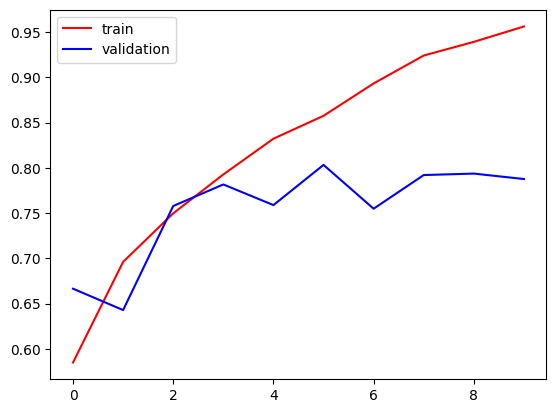

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

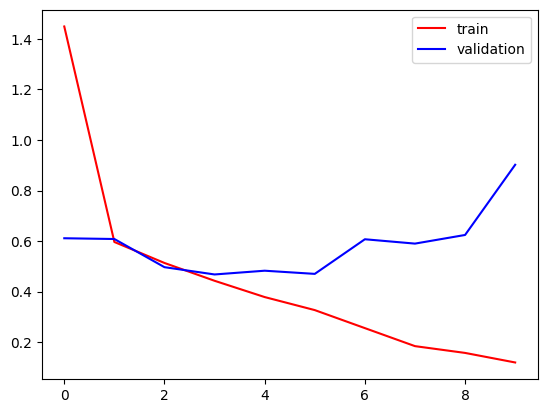

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [37]:
test_img = cv2.imread('/content/cat.jpeg')

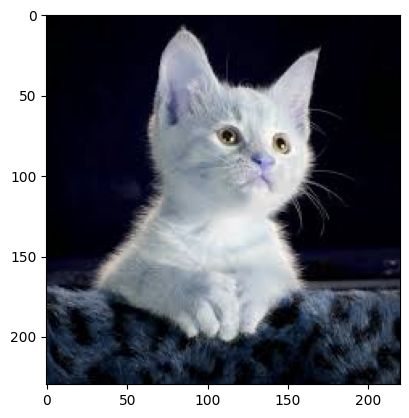

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(230, 220, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_input = test_img.reshape((1,256,256,3))

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.00010182]], dtype=float32)